colab에서 구글드라이브 연동 가능

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
names1880=pd.read_csv("babynames/yob1880.txt", header=None, names=['name', 'sex', 'births'])
names1880
#퀴즈3
#names1880에서 성별에 따른 태어난 아이들 수 수의 합계 출력
names1880.groupby('sex').births.sum()

years=range(1880,2011)
pieces=[]

In [4]:
for year in years:
    path="babynames/yob%d.txt" % year
    frame=pd.read_csv(path, header=None, names=['name', 'sex', 'births'])
    frame['year']=year
    pieces.append(frame)
    #print(frame)
    #print(path)

In [5]:
len(pieces[0][pieces[0].sex=='F']) #942
len(pieces[130][pieces[130].sex=='F']) #19698
#1880년 여자 아이들의 이름의 종류:942,
#2010년 여자 아이들의 이름의 종류:19698
#이름이 매우 다양해졌다
#시각화()

19698

In [6]:
len(pieces)

131

In [7]:
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


## 시대별로 특정 이름이 차지하는 비율 -> 이름이 흔한지 여부 확인

<AxesSubplot:xlabel='year'>

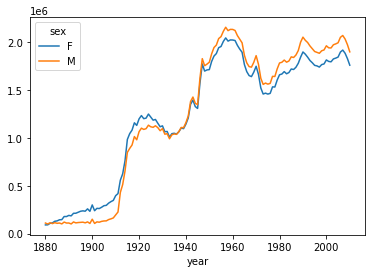

In [9]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.plot()

In [10]:
names.groupby(["year","sex"]).births.sum()

year  sex
1880  F        90993
      M       110493
1881  F        91955
      M       100748
1882  F       107851
              ...   
2008  M      2032310
2009  F      1827643
      M      1973359
2010  F      1759010
      M      1898382
Name: births, Length: 262, dtype: int64

In [11]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group

In [12]:
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [13]:
names.groupby(['year','sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

각 이름이 차지하는 비율이 크던 1880년대와 달리 2010년으로 오면서 각 이름이 차지하는 비율이 매우 작아졌다. 또한, 이름의 종류도 증가했다. 이를 통해, 이름이 흔하지 않아졌으며 다양성이 증가했다고 판단할 수 있다.

## 이름의 상대 순위
각 연도별로 가장 인기있는 이름 1000개?

In [15]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [17]:
top1000 = names.groupby(['year','sex']).apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [18]:
top1000.loc[1880]

name sex  births  year      prop
sex                                            
F   0          Mary   F    7065  1880  0.077643
    1          Anna   F    2604  1880  0.028618
    2          Emma   F    2003  1880  0.022013
    3     Elizabeth   F    1939  1880  0.021309
    4        Minnie   F    1746  1880  0.019188
...             ...  ..     ...   ...       ...
M   1880       Cleo   M       5  1880  0.000045
    1881   Crockett   M       5  1880  0.000045
    1882      Cyril   M       5  1880  0.000045
    1883      Daisy   M       5  1880  0.000045
    1884     Denver   M       5  1880  0.000045

[1942 rows x 5 columns]

In [21]:
top1000.reset_index(inplace=True, drop=True)
top1000
# drop=True: 기존 인덱스를 drop하고 새로운 인덱스를 부여(0~)
# inplace=True: reset결과를 반영

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [22]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

In [23]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [24]:
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.000142
260873,Leilah,F,250,2010,0.000142
260874,Alaysia,F,250,2010,0.000142
260875,Dania,F,249,2010,0.000142


## 이름 유행 분석, 유명인의 이름

In [27]:
total_births=top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
# 연도와 이름에 대한 전체 출생수
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [31]:
subset = total_births[['John','Harry','Mary','Marilyn','Sophia']]
subset

name,John,Harry,Mary,Marilyn,Sophia
year,,,,,
1880,9701.0,2158.0,7092.0,NaN,138.0
1881,8795.0,2002.0,6948.0,NaN,122.0
1882,9597.0,2246.0,8179.0,NaN,179.0
1883,8934.0,2116.0,8044.0,NaN,159.0
1884,9427.0,2338.0,9253.0,NaN,170.0
...,...,...,...,...,...
2006,15140.0,414.0,4073.0,596.0,13484.0
2007,14405.0,443.0,3665.0,597.0,17002.0
2008,13273.0,379.0,3478.0,543.0,16042.0


<AxesSubplot:xlabel='year'>

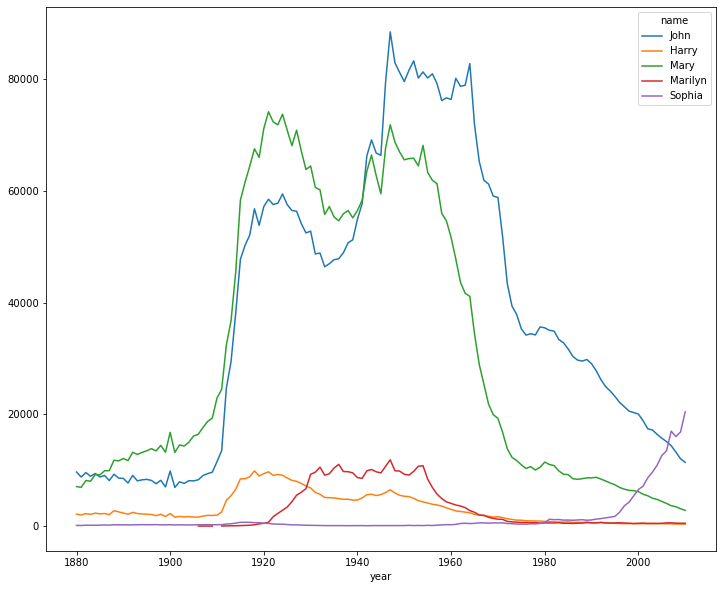

In [34]:
subset.plot(figsize=(12,10))

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

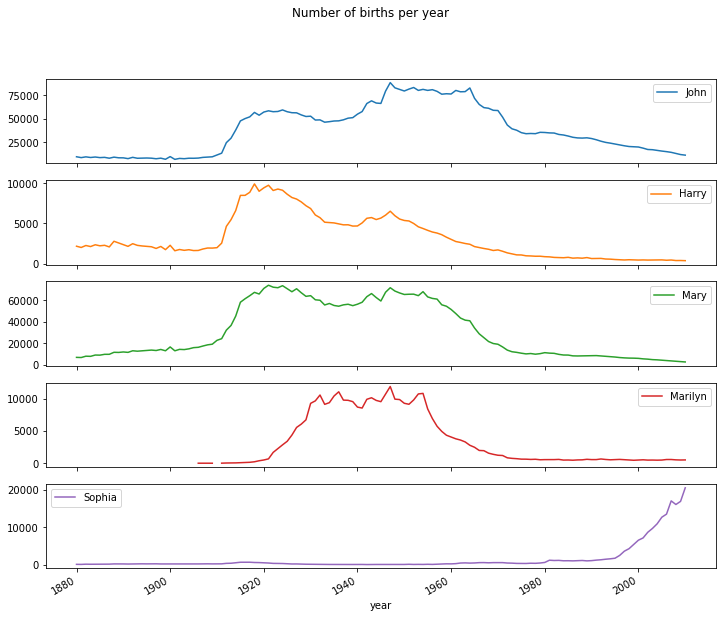

In [38]:
subset.plot(figsize=(12,10), subplots=True,
           title="Number of births per year")

Marilyn의 경우, 유명인 Marilyn이 유명했을 당시 그 특정시기에 이름을 많이 사용한 것으로 보여진다. 따라서 유명인의 이름과 해당 시기의 아이들의 이름간에 영향이 있을 것으로 보인다.

## 이름의 다양성 측정

In [40]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

<AxesSubplot:xlabel='year'>

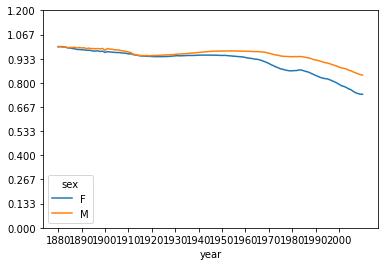

In [49]:
table.plot(fig=(10,6), xticks=range(1880,2010,10), yticks = np.linspace(0,1.2,10))

In [ ]:
# 이름으로 정렬 -> 전체 출생수의 50%를 차지하는 이름의 종류 개수를 출력

In [52]:
boys
# 1000 * 131 = 131000개(실제로는 130997개)
df = boys[boys.year==2010]
# prop열의 누적합이 50%가 되는 지점까지의 이름의 종류 개수
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [62]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:117] #0~116번까지, 116번 index에서 0.5가 넘어감

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
260989    0.493474
260990    0.495275
260991    0.497069
260992    0.498861
260993    0.500652
Name: prop, Length: 117, dtype: float64

In [66]:
# searchsorted 함수 활용하는 방법
prop_cumsum.values.searchsorted(0.5)  #116

116

In [67]:
df=boys[boys.year==1900]
df

,name,sex,births,year,prop
40877,John,M,9834,1900,0.065319
40878,William,M,8580,1900,0.056990
40879,James,M,7246,1900,0.048129
40880,George,M,5405,1900,0.035901
40881,Charles,M,4102,1900,0.027246
...,...,...,...,...,...
41872,Theron,M,8,1900,0.000053
41873,Terrell,M,8,1900,0.000053
41874,Solon,M,8,1900,0.000053
41875,Rayfield,M,8,1900,0.000053


In [68]:
in1900=df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)  #24

24

In [69]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [70]:
def get_quantile_count(group, q=0.5):
    temp=group.sort_values(by='prop', ascending=False).prop.cumsum()
    return temp.values.searchsorted(0.5)+1

In [71]:
top1000.groupby(['year','sex']).apply(get_quantile_count)

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

1880년대에 50%에 해당하는 이름의 종류는 여아 38가지, 남아 14가지였다. 반면, 2010년에는 여아 246가지, 남아 117가지였다. 즉, 다양성이 증가한 것을 확인할 수 있다.

In [72]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<AxesSubplot:xlabel='year'>

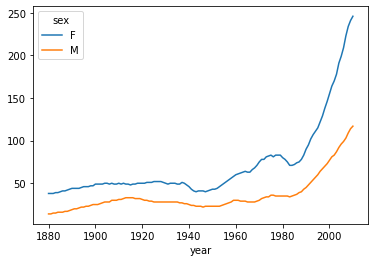

In [73]:
diversity.plot()

조사 기간 내내 남아의 이름보다 여아의 이름이 더 다양했다. 또한, 여아와 남아의 이름 간의 다양성의 차이가 1880년대에는 크지 않았으나, 2010년대로 갈수록 다양성의 차이가 급격하게 커진다.

## 모음, 자음, 길이, 철자변화, 첫글자와 끝글자 등 이름 유행 분석, 유명인의 이름, 인구통계학적 변화

In [76]:
names
names.name
names.name.map(lambda x: x[-1])

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [78]:
# 시리즈에 저장된 문자열 각각에 대해 마지막 글자 추출
last_letters=names.name.map(lambda x: x[-1])
last_letters.name='last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [82]:
table = names.pivot_table('births', 
                  index=last_letters, columns=['sex','year'], 
                  aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [85]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [88]:
# 전체 출생자 수에서 성별로 나누어 마지막 글자가 차지하는 비율?
subtable.sum()
subtable / subtable.sum()
# F, 1910이며, last_letter가 e = 0.336941

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

In [89]:
letter_prop = subtable / subtable.sum()

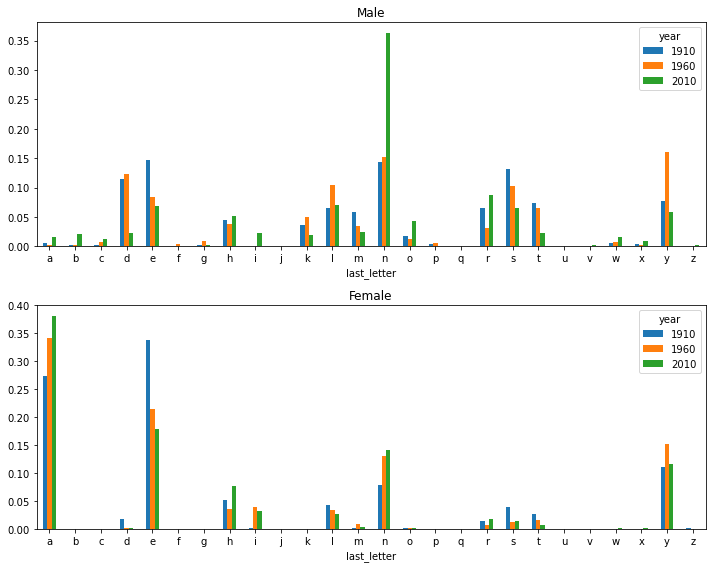

In [100]:
# 마지막 글자의 비율을 연도별, 성별로 나누어 출력
fig, axes = plt.subplots(2,1,figsize=(10,8))

letter_prop['M'].plot(kind='bar', ax=axes[0], rot=0, title='Male')
letter_prop['F'].plot(kind='bar', ax=axes[1], rot=0, title='Female')
plt.tight_layout()

## 첫번째 글자의 비율을 연도별, 성별로 나누어 출력

In [101]:
first_letters=names.name.map(lambda x: x[0])
first_letters.name='first_letter'
first_letters

0          M
1          A
2          E
3          E
4          M
          ..
1690779    Z
1690780    Z
1690781    Z
1690782    Z
1690783    Z
Name: first_letter, Length: 1690784, dtype: object

In [102]:
table = names.pivot_table('births', 
                  index=first_letters, columns=['sex','year'], 
                  aggfunc=sum)
table

sex                 F                                                        \
year             1880     1881     1882     1883     1884     1885     1886   
first_letter                                                                  
A              9334.0   9405.0  11001.0  11632.0  13324.0  13437.0  14416.0   
B              3874.0   4013.0   4824.0   5194.0   6005.0   6340.0   6990.0   
C              5868.0   5661.0   6454.0   6857.0   7919.0   8164.0   8412.0   
D              2218.0   2299.0   2557.0   2709.0   3060.0   3031.0   3231.0   
E             11444.0  11742.0  13771.0  14449.0  16465.0  17379.0  18825.0   
F              2957.0   2875.0   3512.0   3614.0   4196.0   4499.0   5065.0   
G              2463.0   2621.0   3054.0   3210.0   3790.0   4007.0   4533.0   
H              2743.0   2630.0   3192.0   3373.0   3973.0   4174.0   4648.0   
I              2480.0   2456.0   2788.0   2890.0   3389.0   3450.0   3870.0   
J              3801.0   3813.0   4491.0   4612.0   5239.0   5528.0   5828.0   
K              1514.0   1473.0   1729.0   1752.0   1971.0   2064.0   2212.0   
L              8714.0   8970.0  10417.0  11051.0  12248.0  12687.0  13663.0   
M             19779.0  19670.0  23213.0  23631.0  27079.0  27529.0  29540.0   
N              3026.0   3291.0   3536.0   3774.0   4231.0   4346.0   4653.0   
O               968.0    974.0   1244.0   1391.0   1624.0   1601.0   1939.0   
P              1064.0   1144.0   1442.0   1564.0   1889.0   1960.0   2136.0   
Q                28.0     22.0     22.0     17.0     32.0     28.0     50.0   
R              2647.0   2715.0   3198.0   3235.0   3943.0   4230.0   4559.0   
S              3958.0   3935.0   4587.0   4483.0   5084.0   5056.0   5682.0   
T               503.0    513.0    618.0    685.0    844.0    750.0    960.0   
U                15.0     20.0     34.0     26.0     37.0     57.0     50.0   
V               930.0    959.0   1281.0   1292.0   1563.0   1706.0   1970.0   
W               467.0    544.0    640.0    640.0    781.0    747.0    904.0   
X                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Y                 7.0      NaN      NaN      NaN      5.0      7.0     13.0   
Z               191.0    210.0    246.0    241.0    330.0    279.0    389.0   

sex                                      ...         M                      \
year             1887     1888     1889  ...      2001      2002      2003   
first_letter                             ...                                 
A             14836.0  17729.0  17689.0  ...  189874.0  195896.0  208421.0   
B              7110.0   8775.0   8744.0  ...  102260.0  102009.0  103251.0   
C              8605.0  10412.0  10257.0  ...  176796.0  171727.0  176042.0   
D              3144.0   3852.0   3732.0  ...  154619.0  151285.0  153742.0   
E             19140.0  23258.0  23244.0  ...   84224.0   90358.0   94306.0   
F              5253.0   6690.0   6607.0  ...   16445.0   15896.0   16565.0   
G              4558.0   5676.0   5908.0  ...   54536.0   56917.0   59826.0   
H              5002.0   6391.0   6629.0  ...   32295.0   33375.0   33648.0   
I              3862.0   4741.0   4782.0  ...   35630.0   36566.0   37990.0   
J              5629.0   7150.0   6893.0  ...  337470.0  337175.0  335152.0   
K              2310.0   2596.0   2592.0  ...   75640.0   76026.0   77075.0   
L             13611.0  16682.0  16427.0  ...   62313.0   65877.0   71223.0   
M             29632.0  35768.0  35784.0  ...  137238.0  133808.0  132089.0   
N              4695.0   5538.0   5439.0  ...   74284.0   72003.0   70740.0   
O              1960.0   2335.0   2438.0  ...   14709.0   16947.0   19314.0   
P              2286.0   2797.0   2770.0  ...   31945.0   30202.0   30151.0   
Q                33.0     38.0     46.0  ...    4794.0    4757.0    4907.0   
R              4612.0   5936.0   6135.0  ...   87789.0   85872.0   86587.0   
S              5395.0   6711.0   6549.0  ...   86209.0   84017.0   816

In [103]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
first_letter                                                          
A             34079.0   88898.0  309608.0  12706.0   82001.0  198870.0
B             17117.0  100925.0   64191.0   4325.0   95401.0  108460.0
C             18287.0  191419.0   96780.0  15199.0  111173.0  168356.0
D             14529.0  211674.0   47211.0   5251.0  240904.0  123298.0
E             45987.0   58421.0  118824.0  13306.0   58281.0  102513.0
F             14626.0   13475.0   13934.0   9070.0   31563.0   16191.0
G             16250.0   40441.0   49385.0   8638.0   96514.0   61902.0
H             19385.0   15197.0   46936.0  12811.0   27645.0   36378.0
I             10419.0    8026.0   47144.0   1572.0    3918.0   37702.0
J             15950.0  175223.0  118205.0  34856.0  318839.0  299282.0
K              5078.0  149850.0  144023.0   1354.0   96895.0   83903.0
L             33585.0  193460.0  115540.0  10976.0   64452.0  101327.0
M             72790.0  172838.0  173879.0   7495.0  208289.0  123792.0
N              7775.0   36930.0   54043.0   2251.0   15859.0   62540.0
O              5693.0    2669.0   19629.0   2734.0    4733.0   23865.0
P              7012.0   98427.0   32233.0   4703.0   66490.0   29735.0
Q               137.0     200.0    1917.0     43.0     583.0    4363.0
R             21721.0   94663.0   56560.0  15765.0  263498.0   79825.0
S             11534.0  186448.0  136880.0   5775.0  112986.0   70409.0
T              5587.0  111748.0   40149.0   5503.0  135081.0   75030.0
U               159.0     333.0     590.0     85.0     494.0    2946.0
V             13144.0   45277.0   29088.0   1801.0   14382.0   11628.0
W              4219.0   16883.0    3826.0  17899.0   81391.0   36196.0
X                 NaN      27.0    2411.0      NaN     126.0    8774.0
Y               295.0    7588.0   11561.0     20.0     342.0    7627.0
Z              1058.0    1022.0   24463.0     60.0     748.0   23470.0

In [104]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                  F                             M                    
year              1910      1960      2010      1910      1960      2010
first_letter                                                            
A             0.085968  0.043964  0.176013  0.065428  0.038451  0.104758
B             0.043179  0.049912  0.036493  0.022271  0.044735  0.057133
C             0.046131  0.094665  0.055020  0.078265  0.052131  0.088684
D             0.036651  0.104682  0.026840  0.027039  0.112963  0.064949
E             0.116007  0.028892  0.067552  0.068518  0.027329  0.054000
F             0.036896  0.006664  0.007922  0.046705  0.014800  0.008529
G             0.040992  0.020000  0.028075  0.044480  0.045257  0.032608
H             0.048901  0.007516  0.026683  0.065969  0.012963  0.019163
I             0.026283  0.003969  0.026801  0.008095  0.001837  0.019860
J             0.040236  0.086656  0.067200  0.179487  0.149508  0.157651
K             0.012810  0.074108  0.081877  0.006972  0.045435  0.044197
L             0.084722  0.095675  0.065685  0.056520  0.030222  0.053375
M             0.183620  0.085476  0.098850  0.038595  0.097670  0.065209
N             0.019613  0.018264  0.030724  0.011591  0.007437  0.032944
O             0.014361  0.001320  0.011159  0.014078  0.002219  0.012571
P             0.017688  0.048677  0.018325  0.024218  0.031178  0.015663
Q             0.000346  0.000099  0.001090  0.000221  0.000273  0.002298
R             0.054793  0.046815  0.032154  0.081180  0.123558  0.042049
S             0.029096  0.092207  0.077816  0.029738  0.052981  0.037089
T             0.014094  0.055264  0.022825  0.028337  0.063341  0.039523
U             0.000401  0.000165  0.000335  0.000438  0.000232  0.001552
V             0.033157  0.022391  0.016537  0.009274  0.006744  0.006125
W             0.010643  0.008349  0.002175  0.092169  0.038165  0.019067
X                  NaN  0.000013  0.001371       NaN  0.000059  0.004622
Y             0.000744  0.003753  0.006572  0.000103  0.000160  0.004018
Z             0.002669  0.000505  0.013907  0.000309  0.000351  0.012363

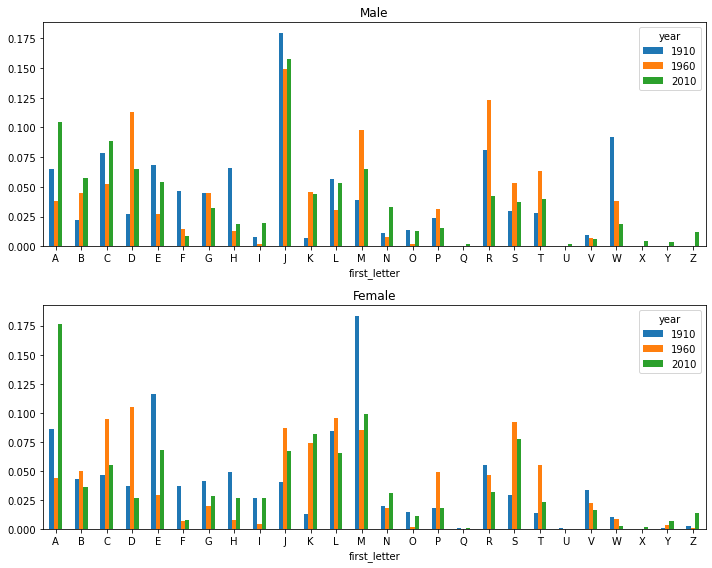

In [105]:
# 첫번째 글자의 비율을 연도별, 성별로 나누어 출력
fig, axes = plt.subplots(2,1,figsize=(10,8))

letter_prop['M'].plot(kind='bar', ax=axes[0], rot=0, title='Male')
letter_prop['F'].plot(kind='bar', ax=axes[1], rot=0, title='Female')
plt.tight_layout()

In [107]:
letter_p = table/table.sum()
dny_ts=letter_p.loc[['D','N','Y'], 'M'].T
dny_ts

first_letter,D,N,Y
year,,,
1880,0.022517,0.008082,0.000226
1881,0.021519,0.007504,0.000218
1882,0.021647,0.007802,0.000132
1883,0.022211,0.007416,0.000115
1884,0.020866,0.007681,0.000140
...,...,...,...
2006,0.072995,0.036504,0.003224
2007,0.072109,0.035155,0.003517
2008,0.068771,0.033876,0.003808


<AxesSubplot:xlabel='year'>

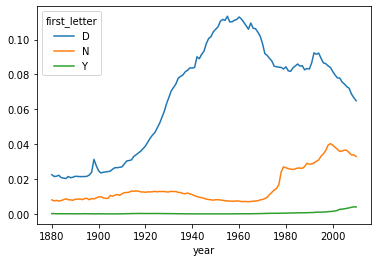

In [108]:
dny_ts.plot()

## 가장 많이 증가하거나 감소한 이름